# Analyzing AI-Generated vs. Human-Written Code
----

## Business understanding

The goal of this project is to differentiate between AI-generated and human-written code snippets. By analyzing various features of the code, such as the execution time, length, complexity, and the presence of lambda functions, we aim to build a model that can accurately classify the origin of the code.

Our research questions are:

- Which code features best distinguish AI-generated and human-written code?
- Which type of code (AI-generated or human-written) executes faster?
- Does AI generate more complex code than humans?
- Can AI-generated and human-written code be distinguished based on e.g., execution time and complexity?

By answering these questions, we aim to understand the characteristics of AI-generated code and improve the development of AI coding tools and compare it to human written code.


## Data understanding

The dataset used in this project is from [Kaggle](https://www.kaggle.com/). It consists of AI-generated and human-written code samples, each solving various programming tasks. Each sample is labeled as either AI-generated or human-written. The dataset provides a mix of syntactic, structural, and performance-related features that help analyze and compare AI-generated and human-written code.

We found that the dataset is now removed from the site. Fortunately, we had already downloaded the dataset as a CSV file, so we could still use it for our analysis.

We first loaded the dataset and examined its structure:

In [2]:
import pandas as pd

# Dataset from data directory
df = pd.read_csv('../data/ai_vs_human_code_dataset.csv')

# Dataset Summary
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Display column names and their data types
print("\nData types of each feature:")
print(df.dtypes)

Dataset has 1500 rows and 15 columns.

Data types of each feature:
code_id              object
code_snippet         object
code_length           int64
num_functions         int64
num_classes           int64
num_variables         int64
num_comments          int64
comment_density     float64
num_imports           int64
use_of_recursion      int64
use_of_lambda         int64
num_loops             int64
complexity_score      int64
execution_time      float64
ai_generated          int64
dtype: object


This allowed us to understand the size of the dataset and the types of features available.

#### Missing values

To ensure data quality, we checked for missing values in the dataset:

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
missing_info = pd.DataFrame({
    'Missing values': missing_values,
    'Percentage': (missing_values / len(df)) * 100
})

# Display missing value report
print("\nMissing values in the dataset:")
print(missing_info)


Missing values in the dataset:
                  Missing values  Percentage
code_id                        0         0.0
code_snippet                   0         0.0
code_length                    0         0.0
num_functions                  0         0.0
num_classes                    0         0.0
num_variables                  0         0.0
num_comments                   0         0.0
comment_density                0         0.0
num_imports                    0         0.0
use_of_recursion               0         0.0
use_of_lambda                  0         0.0
num_loops                      0         0.0
complexity_score               0         0.0
execution_time                 0         0.0
ai_generated                   0         0.0


This result indicates that there are no missing values in the dataset, so the dataset is complete. We could perform the analysis without any additional preprocessing related to missing values.

#### Unique values

After examining the missing values we checked the number of unique values in each column. This helps us to identify:
- Columns with low variability (e.g., columns with constant values)
- Features that may not have meaningful information to our model
- Data distribution across columns

In [4]:
# Check the number of unique values in each column
df.nunique()

code_id              10
code_snippet         10
code_length           9
num_functions         2
num_classes           1
num_variables         3
num_comments          1
comment_density       1
num_imports           2
use_of_recursion      2
use_of_lambda         2
num_loops             2
complexity_score      4
execution_time      693
ai_generated          2
dtype: int64

Since our research questions focus on distinguishing AI-generated and human-written code based on execution time, complexity, and specific code features, we found that certain columns are not relevant for this analysis. Therefore, columns such as `num_classes`, `num_comments`, `comment_density`, `code_id`, and `code_snippet` will be excluded in the preprocessing phase. In the next section, we will provide the reason for their removal and show the preprocessing steps to ensure that only meaningful features are included.

The following features are needed for our analysis:
- `use_of_lambda`: Lambda function usage might be more frequent in AI-generated code.
- `complexity_score`: Measures the complexity of the code and will help assess whether AI-generated code is more complex.
- `num_functions`, `num_variables`, `num_loops`: These features provide structural information that could distinguish between human and AI code.
- `num_imports`: The number of external libraries or modules used may vary between AI-generated and human-written code.
- `code_length`: The total length of the code might indicate the level of detail or the complexity of the code.
- `use_of_recursion`: Recursion usage can help distinguish between AI and human coding styles.
- `execution_time`: Which is more efficient, AI or human-written code?

By understanding the dataset structure, handling missing values and identifying relevant features, we ensured that our data was well-prepared for the preprocessing phase.

## Data Preparation

#### Feature Removal Explanation

The following features will be removed because they do not contribute meaningful information to the analysis:

- `num_classes`, `num_comments`, `comment_density`: These variables always have a single value, meaning they provide zero variance and no useful information.
- `code_id`: This is unnecessary as it only serves as an identifier.
- `code_snippet`: This feature is too complex for this analysis and will not be considered.

By removing these columns, we ensure that the dataset remains relevant and avoids introducing unnecessary noise into the model.


In [5]:
# Create X and y dataframes from whole dataset
y = df['ai_generated']
# Drop unnecessary features
X = df.drop(columns=['ai_generated', 'code_id', 'code_snippet', 'num_classes', 'num_comments', 'comment_density'])

#### Scaling data and dividing it into train and test sets

We experienced severe overfitting of the model, possibly due to the relatively small dataset or the lack of sufficient variability in the data, so we split the data into training and test sets to reduce overfitting. After dividing the dataset, we scaled both test and training datasets using `StandardScaler` to standardize the features. This ensures that all features contribute equally to the model.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data to test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

# Scale both train and test datasets
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train_scaled.head(5)

,code_length,num_functions,num_variables,num_imports,use_of_recursion,use_of_lambda,num_loops,complexity_score,execution_time
0,-0.357497,0.671026,1.529633,-0.819741,-0.315399,-0.33685,1.003817,0.620771,0.306591
1,0.874700,0.671026,-1.099033,1.219898,-0.315399,-0.33685,1.003817,0.620771,-0.302827
2,0.800022,0.671026,1.529633,-0.819741,-0.315399,-0.33685,1.003817,0.620771,0.273350
3,-0.544194,0.671026,-1.099033,-0.819741,-0.315399,-0.33685,-0.996198,-0.362350,-0.140316
4,-0.544194,0.671026,-1.099033,-0.819741,-0.315399,-0.33685,-0.996198,-0.362350,-0.860537


The output displays the first 5 rows of the scaled training data.

The scaled values show the transformed data where each feature is standardized.


## Data Modeling

For our case to predict if code snippet is human-written or AI-generated, we decided to use **Logistic Regression** model. This model suits well for binary classification problems and allows us to analyze which features contribute most to separate the two types of code.

At first, the model was overfitting severely, and splitting the data did not resolve the issue. After several attempts, we found that we can give the Logistic Regression model hyperparameter C to reduce or increase its regularization. Using a lower C value (0.01) applied stronger regularization and reduced model complexity. This helped to improve the model by preventing it from fitting too closely to the training data.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Model fitting
model = LogisticRegression(solver='lbfgs', C=0.01)

# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

# Fit the model
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_test_prediction = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_test_prediction)

print("Cross-Validation Scores: ", cv_scores)
print("Mean CV Accuracy: %0.2f" % cv_scores.mean())
print("Test Set Accuracy: %0.2f\n" % accuracy)
print("Coefficients: ", model.coef_)
print("\nIntercept: ", model.intercept_)

Cross-Validation Scores:  [0.9047619  0.90952381 0.94285714 0.88571429 0.8952381 ]
Mean CV Accuracy: 0.91
Test Set Accuracy: 0.90

Coefficients:  [[-1.01263844 -0.1805689   0.15576452  0.22407693  0.47444439  0.42614826
   0.27764059  0.32194573  0.08783743]]

Intercept:  [-0.04413052]


The model achieved a mean cross-validation accuracy of **91%** and a test accuracy of **90%**, indicating that it effectively differentiated between AI and human-written code.

#### Confusion Matrix Analysis

To evaluate the performance even more, we visualized the confusion matrix:

Accuracy: 0.90
Confusion Matrix:
 [[212   0]
 [ 46 192]]


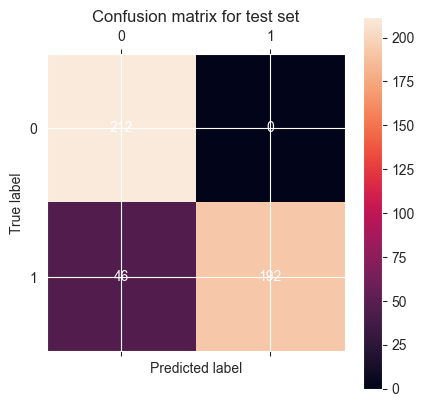

In [25]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_predict

# Predict on test set
y_test_prediction = model.predict(X_test_scaled)

# Initialize confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)

# Accuracy score for y_test
accuracy = accuracy_score(y_test, y_test_prediction)
print("Accuracy: %0.2f" % accuracy)
print("Confusion Matrix:\n", cm)

# Visualize confusion matrix for test dataset
plt.matshow(cm)
plt.title('Confusion matrix for test set')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

#### Cross Validation

Accuracy: 0.90
Confusion Matrix:
 [[538   0]
 [100 412]]


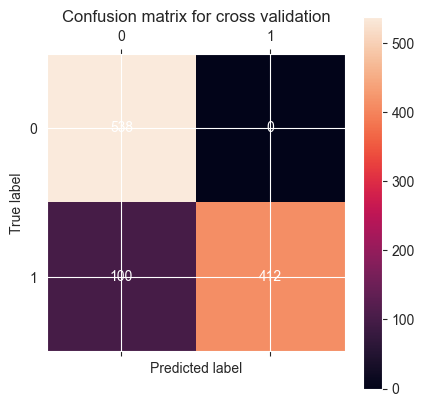

In [26]:
y_prediction = cross_val_predict(estimator=model, X=X_train_scaled, y=y_train, cv=10)

# Initialize confusion matrix
cm_cv = confusion_matrix(y_train, y_prediction)

# Accuracy score for y
accuracy_cv = accuracy_score(y_train, y_prediction)

print("Accuracy: %0.2f" % accuracy_cv)
print("Confusion Matrix:\n", cm_cv)

# Visualize confusion matrix
plt.matshow(cm_cv)
plt.title('Confusion matrix for cross validation')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# Include counts
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_cv[i, j], ha='center', va='center', color='white')
plt.show()

#### Analyzing features

To understand which features contribute most to classification, we applied **permutation importance**:

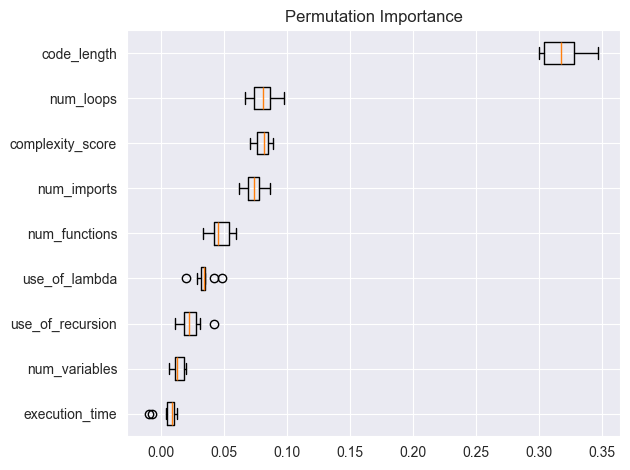

In [9]:
# feature importance
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, scoring="accuracy", random_state=0,
                                n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()

The x-axis represents the importance score, while the y-axis lists the different features.

##### Key Features Distinguishing AI-Generated and Human-Written Code

- The top feature on the plot is `code_length`, meaning it has the highest importance in classification.
- Features like `num_loops`, `complexity_score`, and `num_imports` also have relatively high importance, meaning they are significant in differentiating AI and human code.
- Features at the bottom of the list (e.g., `execution_time`, `num_variables`, `use_of_lambda`) have low importance, meaning they don’t contribute much to distinguishing the two types of code.

**Conclusion:** AI and human code differ most in length, number of loops, and complexity score.

#### Snippet Runner

In [93]:
import re
import time


def ensure_newline_after_functions(code_snippet):
    # Pattern to match function definitions without a newline after them
    pattern = r'(\bdef\s+\w+\s*\(.*\):)([^\n])'

    # Add a newline after function definitions if not present
    modified_code = re.sub(pattern, r'\1\n\2', code_snippet)

    return modified_code


j = 0

for i in range(len(df['code_snippet'])):
    j += 1
    sample = df['code_snippet'][i]
    function_pattern = r'def\s+(\w+)\s*\((\w+)\):'
    match = re.search(function_pattern, sample)

    if match:
        function_name = match.group(1)
        parameter_name = match.group(2)

        # Replace parameter n with 10
        modified_code = re.sub(r'\b' + parameter_name + r'\b', '10', sample)

        # Add function call to the end of the code snippet
        function_call = f'\nresult = {function_name}(300)'
        sample += function_call
        sample = ensure_newline_after_functions(sample)
        start_time = time.perf_counter_ns()
        exec(sample)
        end_time = time.perf_counter_ns()
    else:
        exec(sample)



7
7
7
7
2.0
7
2.0
7
7
2.0
2.0
2.0
2.0
7
2.0
7
2.0
2.0
2.0
7
2.0
7
2.0
7
2.0
7
7
2.0
2.0
7
7
7
7
2.0
2.0
7
7
2.0
2.0
2.0
7
2.0
2.0
2.0
7
7
7
7
2.0
7
7
7
7
7
7
7
2.0
2.0
2.0
2.0
7
2.0
7
2.0
7
2.0
2.0
7
2.0
7
7
2.0
2.0
2.0
2.0
2.0
7
2.0
2.0
7
2.0
2.0
7
7
2.0
2.0
2.0
2.0
2.0
2.0
7
7
2.0
2.0
2.0
7
7
7
7
2.0
7
2.0
2.0
2.0
2.0
7
2.0
7
7
7
7
7
2.0
7
7
7
2.0
7
2.0
2.0
7
7
2.0
7
2.0
2.0
2.0
2.0
2.0
2.0
7
2.0
2.0
2.0
7
2.0
7
7
7
2.0
7
2.0
7
2.0
2.0
7
7
2.0
7
2.0
7
2.0
2.0
7
7
2.0
7
2.0
7
7
7
2.0
7
2.0
2.0
2.0
7
7
2.0
2.0
2.0
7
7
7
2.0
7
2.0
2.0
7
7
2.0
7
7
7
2.0
7
2.0
7
7
2.0
7
2.0
7
7
7
7
7
2.0
2.0
2.0
2.0
7
7
7
7
2.0
7
7
7
2.0
2.0
7
2.0
2.0
7
2.0
7
2.0
7
7
7
7
7
7
2.0
7
7
2.0
2.0
2.0
7
7
2.0
2.0
7
7
7
2.0
7
7
2.0
2.0
2.0
2.0
7
2.0
2.0
2.0
2.0
2.0
7
7
7
2.0
2.0
2.0
2.0
2.0
2.0
7
7
2.0
2.0
2.0
7
2.0
7
7
7
7
2.0
7
7
7
7
7
7
2.0
7
7
2.0
7
7
2.0
2.0
2.0
2.0
7
7
7
2.0
7
2.0
2.0
2.0
7
2.0
7
7
2.0
7
7
2.0
7
7
2.0
7
2.0
7
2.0
2.0
7
7
7
20
7
7
20
20
20
20
7
20
20
20
7
20
20
20
7
20
20
20
20
20
7
20
7
20
